# House prices Dataset Simple Exploratory Data Analysis

Import all the necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.metrics import mean_squared_error
warnings.filterwarnings("ignore")
%matplotlib inline

Read the dataset using python's pandas package and look at first 5 rows

In [2]:
data_df = pd.read_csv("F:\\Masters CS\\kaggle\\Kaggle competitions\\House Prices\\train.csv",parse_dates=['YearBuilt','YrSold','YearRemodAdd'])
test_df = pd.read_csv("F:\\Masters CS\\kaggle\\Kaggle competitions\\House Prices\\test.csv",parse_dates=['YearBuilt','YrSold','YearRemodAdd'])
data_df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008-01-01,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007-01-01,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008-01-01,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006-01-01,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008-01-01,WD,Normal,250000


In [3]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010-01-01,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010-01-01,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010-01-01,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010-01-01,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010-01-01,WD,Normal


## Missing values Analysis

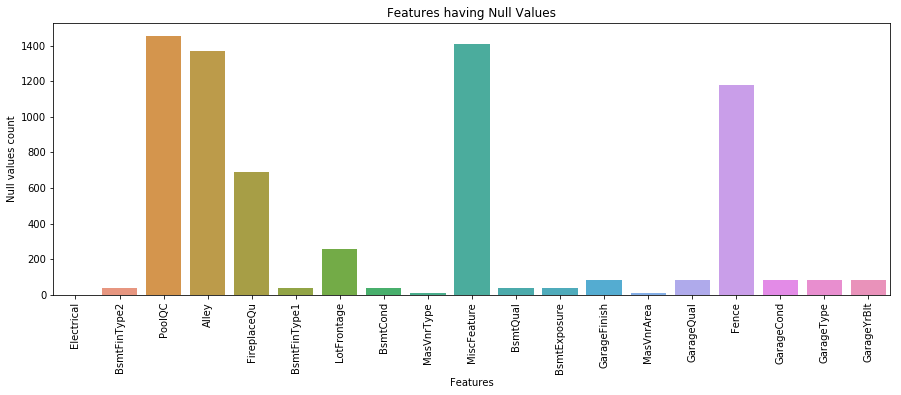

In [4]:
missingValueColumns = dict(data_df.isnull().sum())
missingValueColumns = [[k,v] for k,v in missingValueColumns.items() if v!=0]
missingValueColumns = pd.DataFrame(missingValueColumns,columns=['key','value'])
plt.figure(figsize=(15,5))
sns.barplot(x=missingValueColumns['key'],y=missingValueColumns['value'])
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Null values count")
plt.title("Features having Null Values")
plt.show()

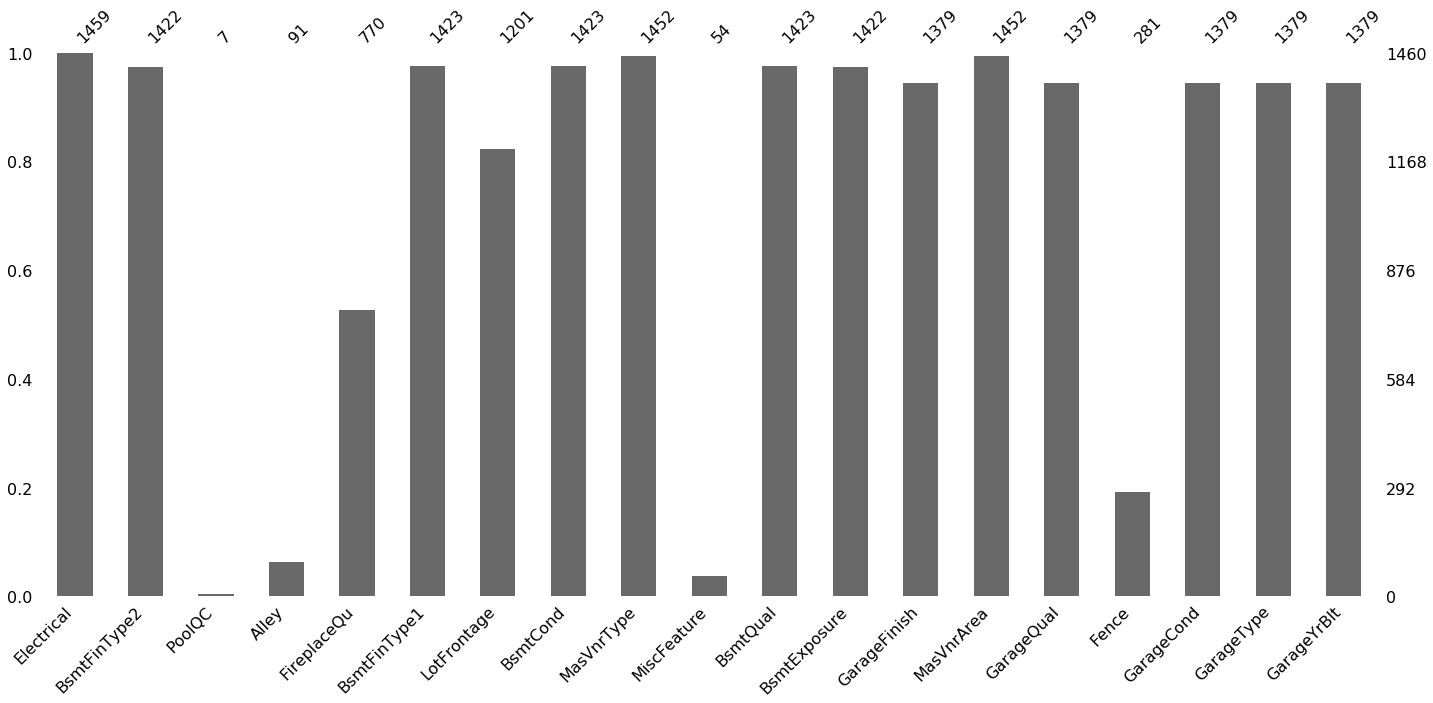

In [5]:
msno.bar(data_df[list(missingValueColumns['key'])])


Before feeding data into machine learning models, we need to remove the null values.
I will remove the null value after performing EDA

Lets see the data types of each feature

In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null datetime64[ns]
YearRemodAdd     1460 non-null datetime64[ns]
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1

Lets see some stats

In [7]:
data_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,103.685262,443.639726,46.549315,567.240411,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,181.066207,456.098091,161.319273,441.866955,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,166.000000,712.250000,0.000000,808.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,755000.000000


## Bivariate Analysis

In [8]:
#yearBuilt
data_df['YearBuilt'] = data_df['YearBuilt'].dt.year
data_df['YrSold'] = data_df['YrSold'].dt.year
data_df['YearRemodAdd'] = data_df['YearRemodAdd'].dt.year

test_df['YearBuilt'] = test_df['YearBuilt'].dt.year
test_df['YrSold'] = test_df['YrSold'].dt.year
test_df['YearRemodAdd'] = test_df['YearRemodAdd'].dt.year


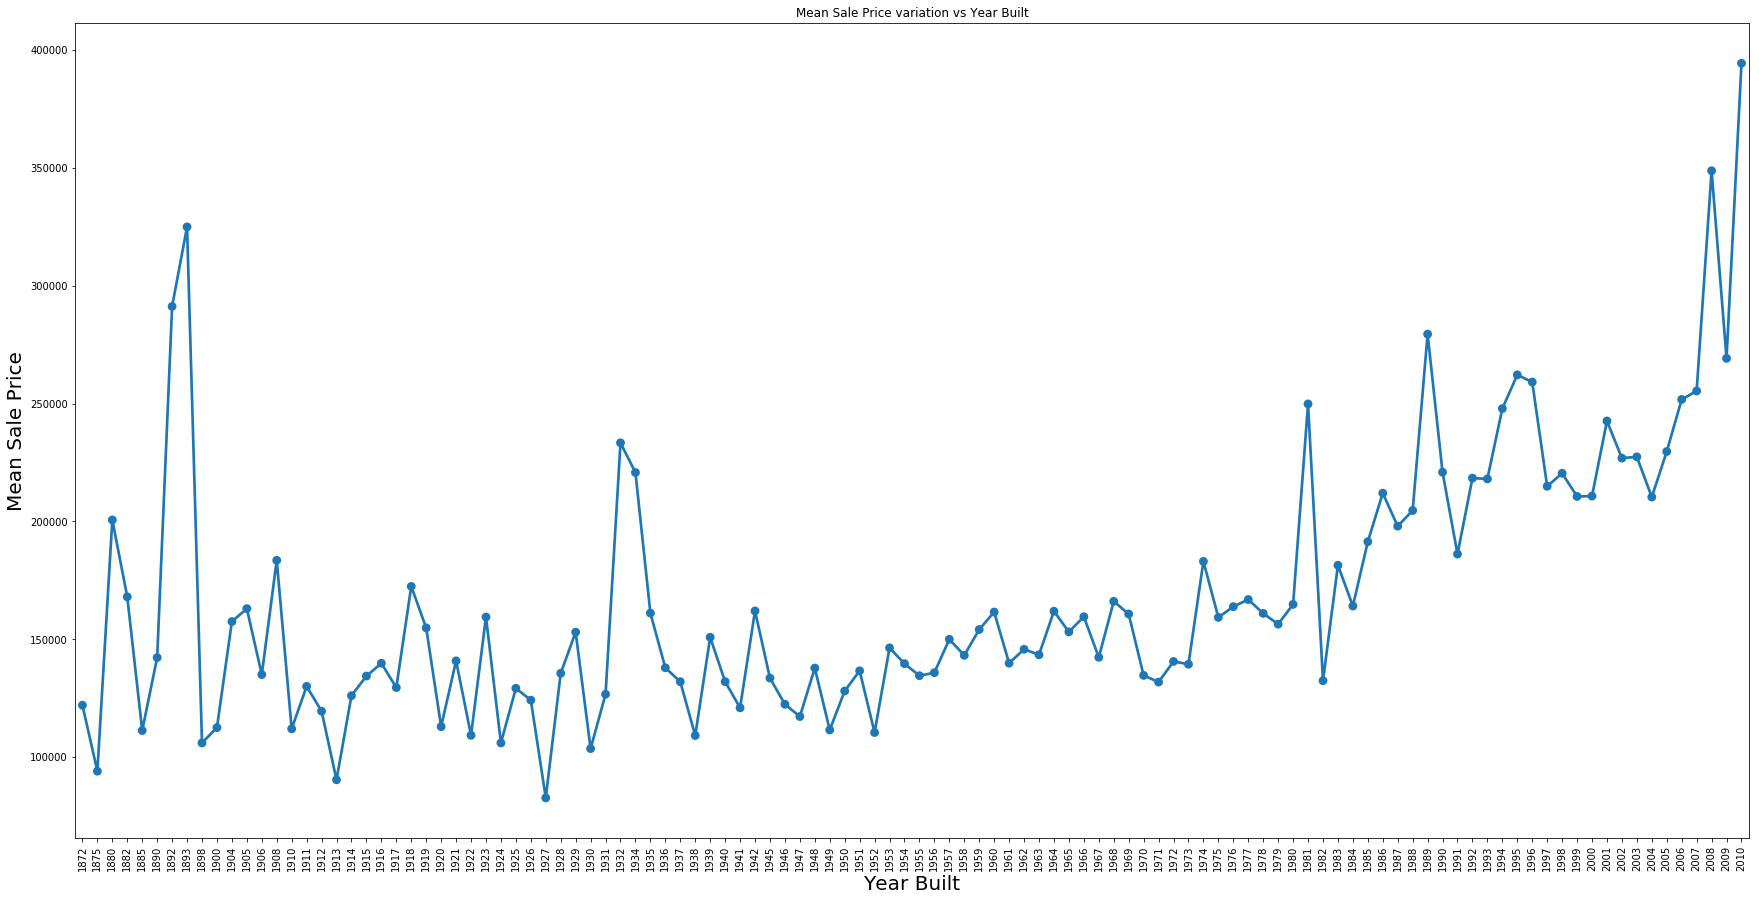

In [9]:
grouped_yrBuilt = data_df.groupby(['YearBuilt'])['SalePrice'].mean()
grouped_yrBuilt = grouped_yrBuilt.reset_index()

plt.figure(figsize=(30,15))
sns.pointplot(x='YearBuilt',y='SalePrice',data=grouped_yrBuilt)
plt.xticks(rotation=90)
plt.xlabel("Year Built",fontsize=20)
plt.ylabel("Mean Sale Price",fontsize=20)
plt.tick_params()
plt.title("Mean Sale Price variation vs Year Built")
plt.show()


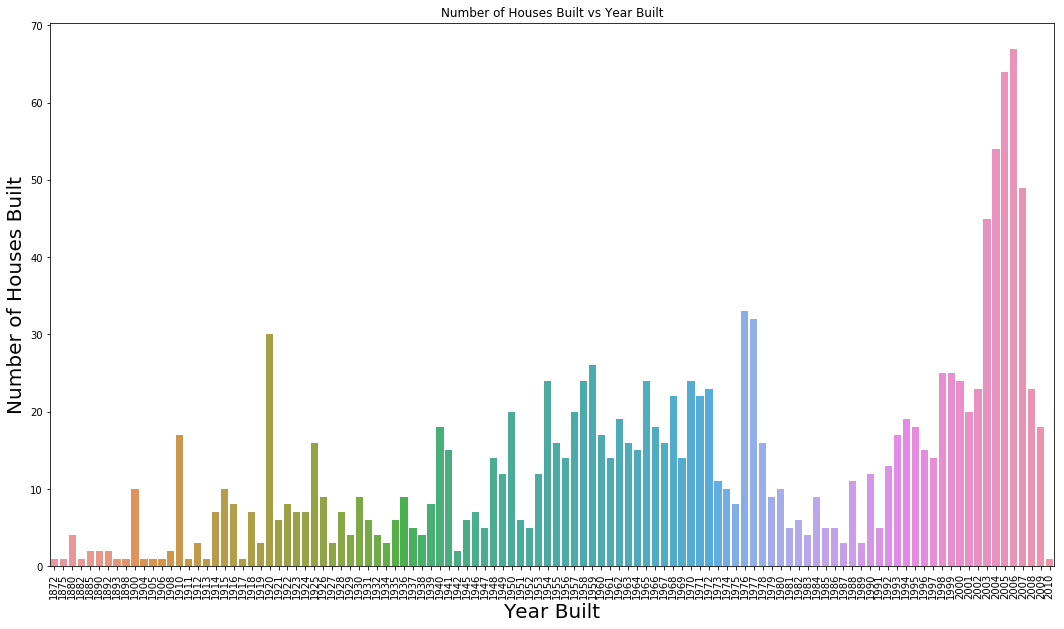

In [10]:
plt.figure(figsize=(18,10))
sns.countplot(x='YearBuilt',data=data_df)
plt.xticks(rotation=90)
plt.xlabel("Year Built",fontsize=20)
plt.ylabel("Number of Houses Built",fontsize=20)
plt.tick_params()
plt.title("Number of Houses Built vs Year Built")
plt.show()

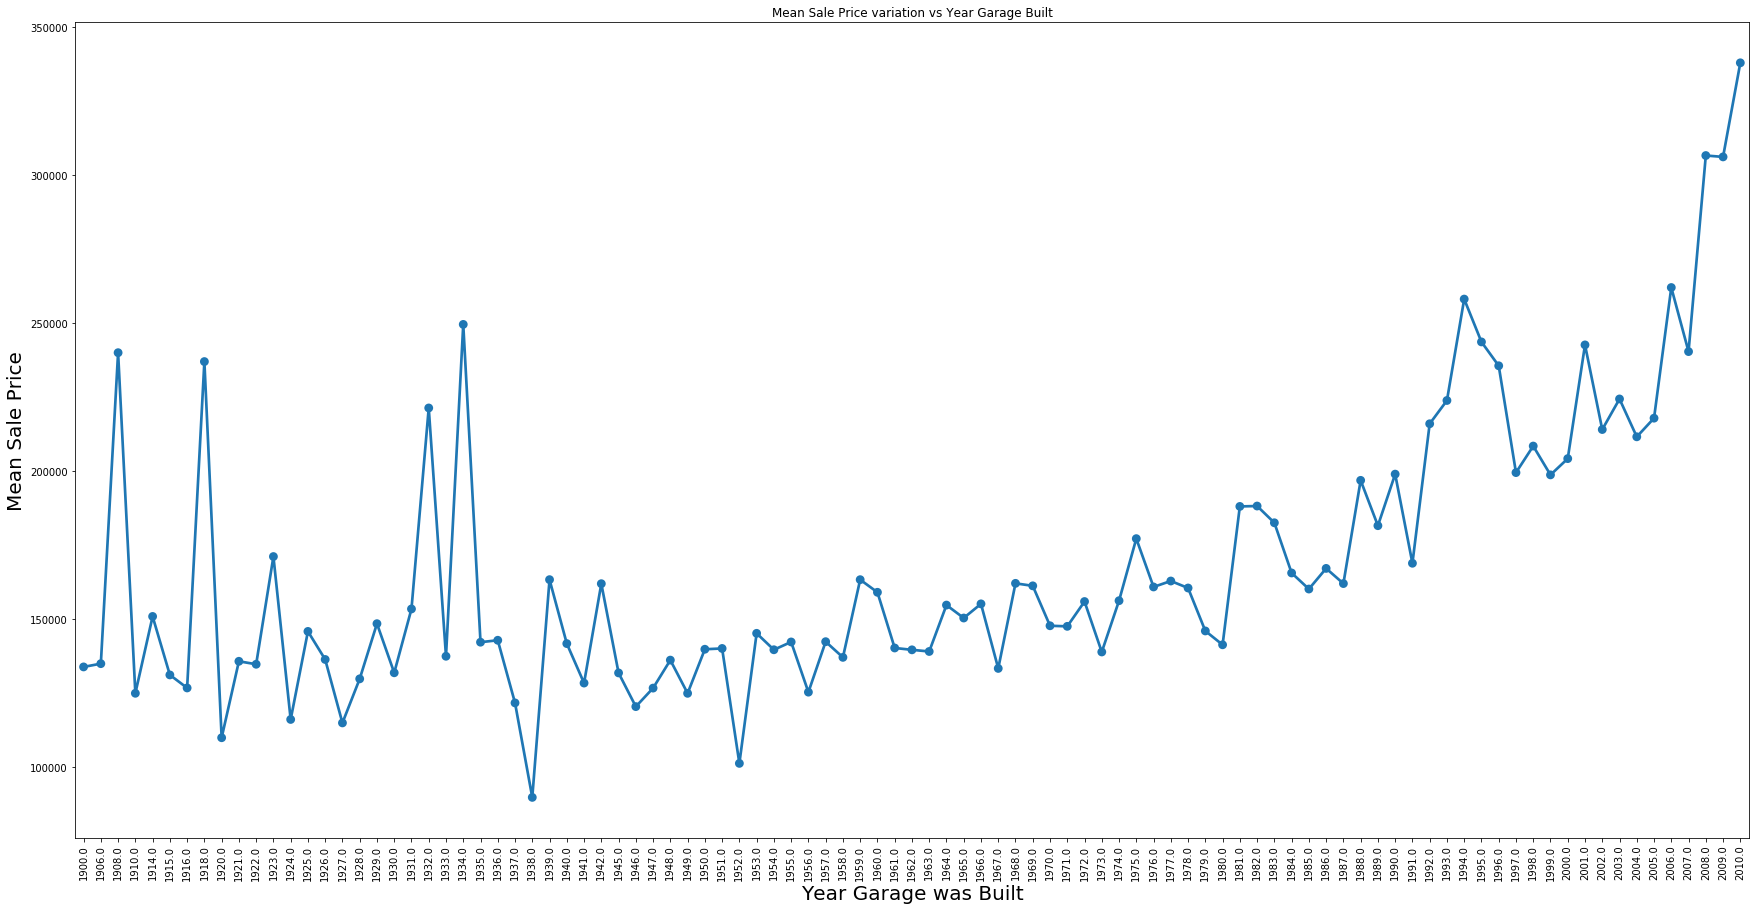

In [11]:
grouped_yrBuilt = data_df.groupby(['GarageYrBlt'])['SalePrice'].mean()
grouped_yrBuilt = grouped_yrBuilt.reset_index()

plt.figure(figsize=(30,15))
sns.pointplot(x='GarageYrBlt',y='SalePrice',data=grouped_yrBuilt)
plt.xticks(rotation=90)
plt.xlabel("Year Garage was Built",fontsize=20)
plt.ylabel("Mean Sale Price",fontsize=20)
plt.tick_params()
plt.title("Mean Sale Price variation vs Year Garage Built")
plt.show()

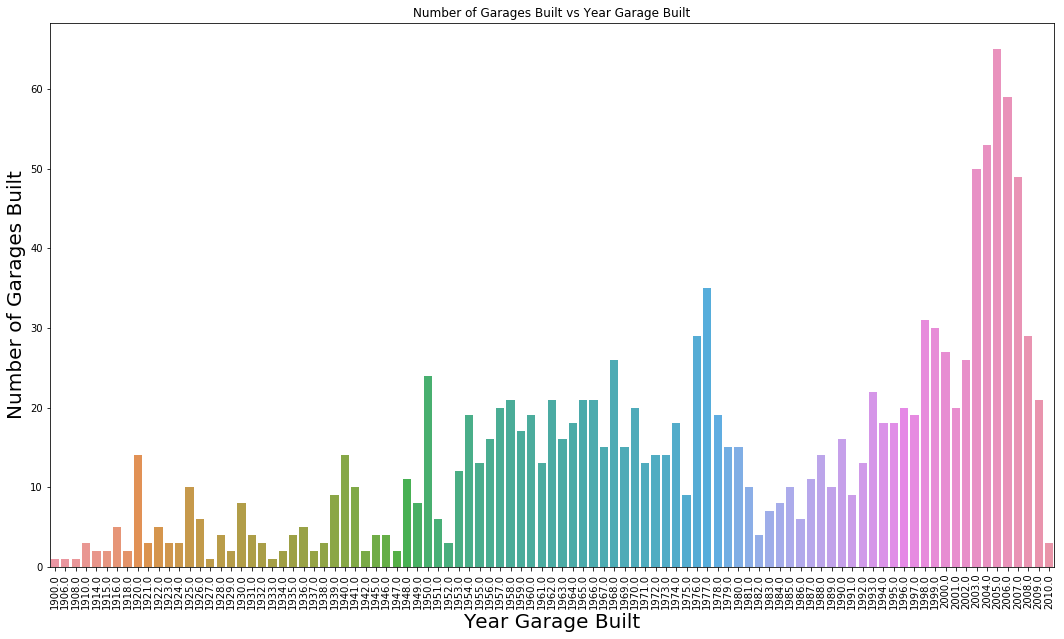

In [12]:
plt.figure(figsize=(18,10))
sns.countplot(x='GarageYrBlt',data=data_df)
plt.xticks(rotation=90)
plt.xlabel("Year Garage Built",fontsize=20)
plt.ylabel("Number of Garages Built",fontsize=20)
plt.tick_params()
plt.title("Number of Garages Built vs Year Garage Built")
plt.show()

#### Interesting year built and year garage built are pretty much corelated with Sale price

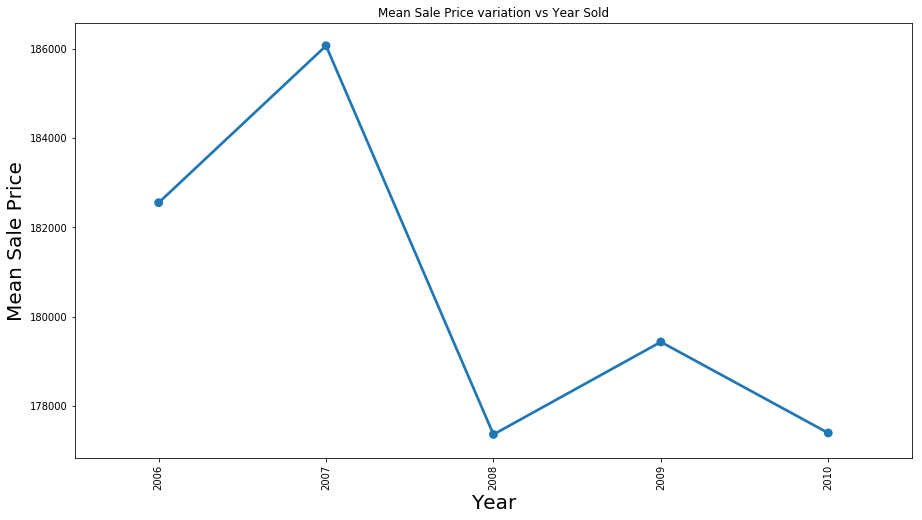

In [13]:
grouped = data_df.groupby(['YrSold'])['SalePrice'].mean()
grouped = grouped.reset_index()

plt.figure(figsize=(15,8))
sns.pointplot(x='YrSold',y='SalePrice',data=grouped)
plt.xticks(rotation=90)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Mean Sale Price",fontsize=20)
plt.tick_params()
plt.title("Mean Sale Price variation vs Year Sold")
plt.show()

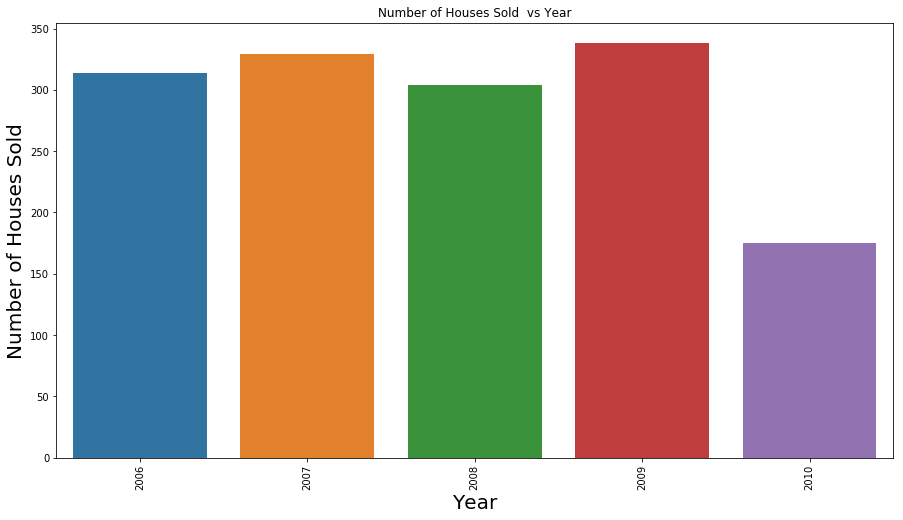

In [14]:
plt.figure(figsize=(15,8))
sns.countplot(x='YrSold',data=data_df)
plt.xticks(rotation=90)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Number of Houses Sold",fontsize=20)
plt.tick_params()
plt.title("Number of Houses Sold  vs Year")
plt.show()

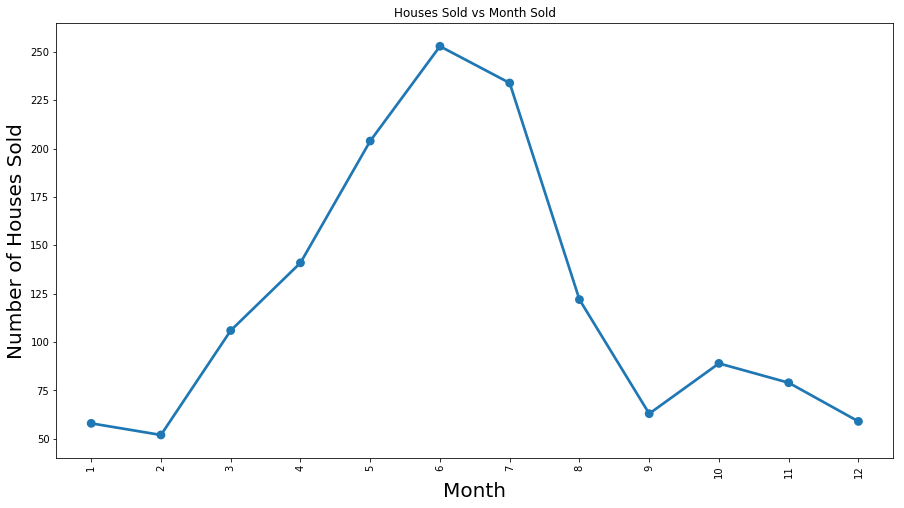

In [15]:
grouped = data_df.groupby(['MoSold'])['SalePrice'].agg('count')
grouped = grouped.reset_index()

plt.figure(figsize=(15,8))
sns.pointplot(x='MoSold',y='SalePrice',data=grouped)
plt.xticks(rotation=90)
plt.xlabel("Month",fontsize=20)
plt.ylabel("Number of Houses Sold",fontsize=20)
plt.tick_params()
plt.title("Houses Sold vs Month Sold")
plt.show()

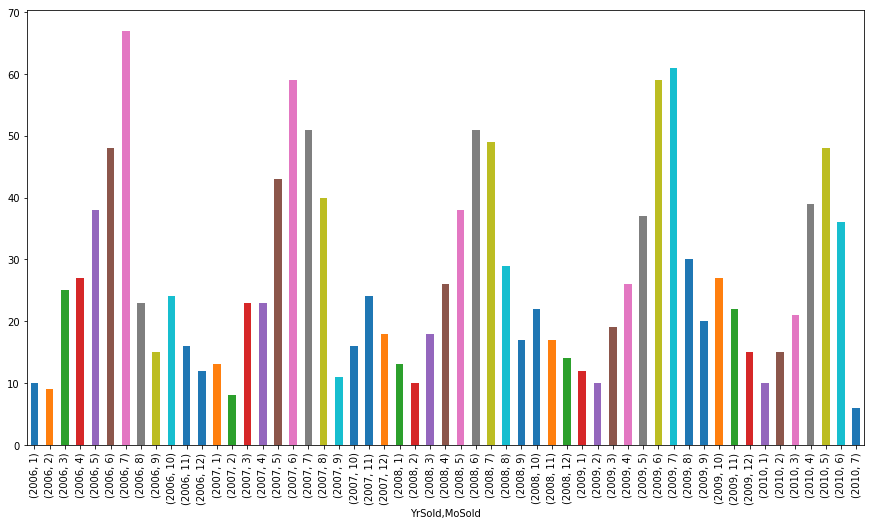

In [16]:
grouped = data_df.groupby(['YrSold','MoSold'])['SalePrice'].agg('count')
grouped.plot(kind='bar',figsize=(15,8))

In [17]:
#More number of houses are sold in the month of june and july

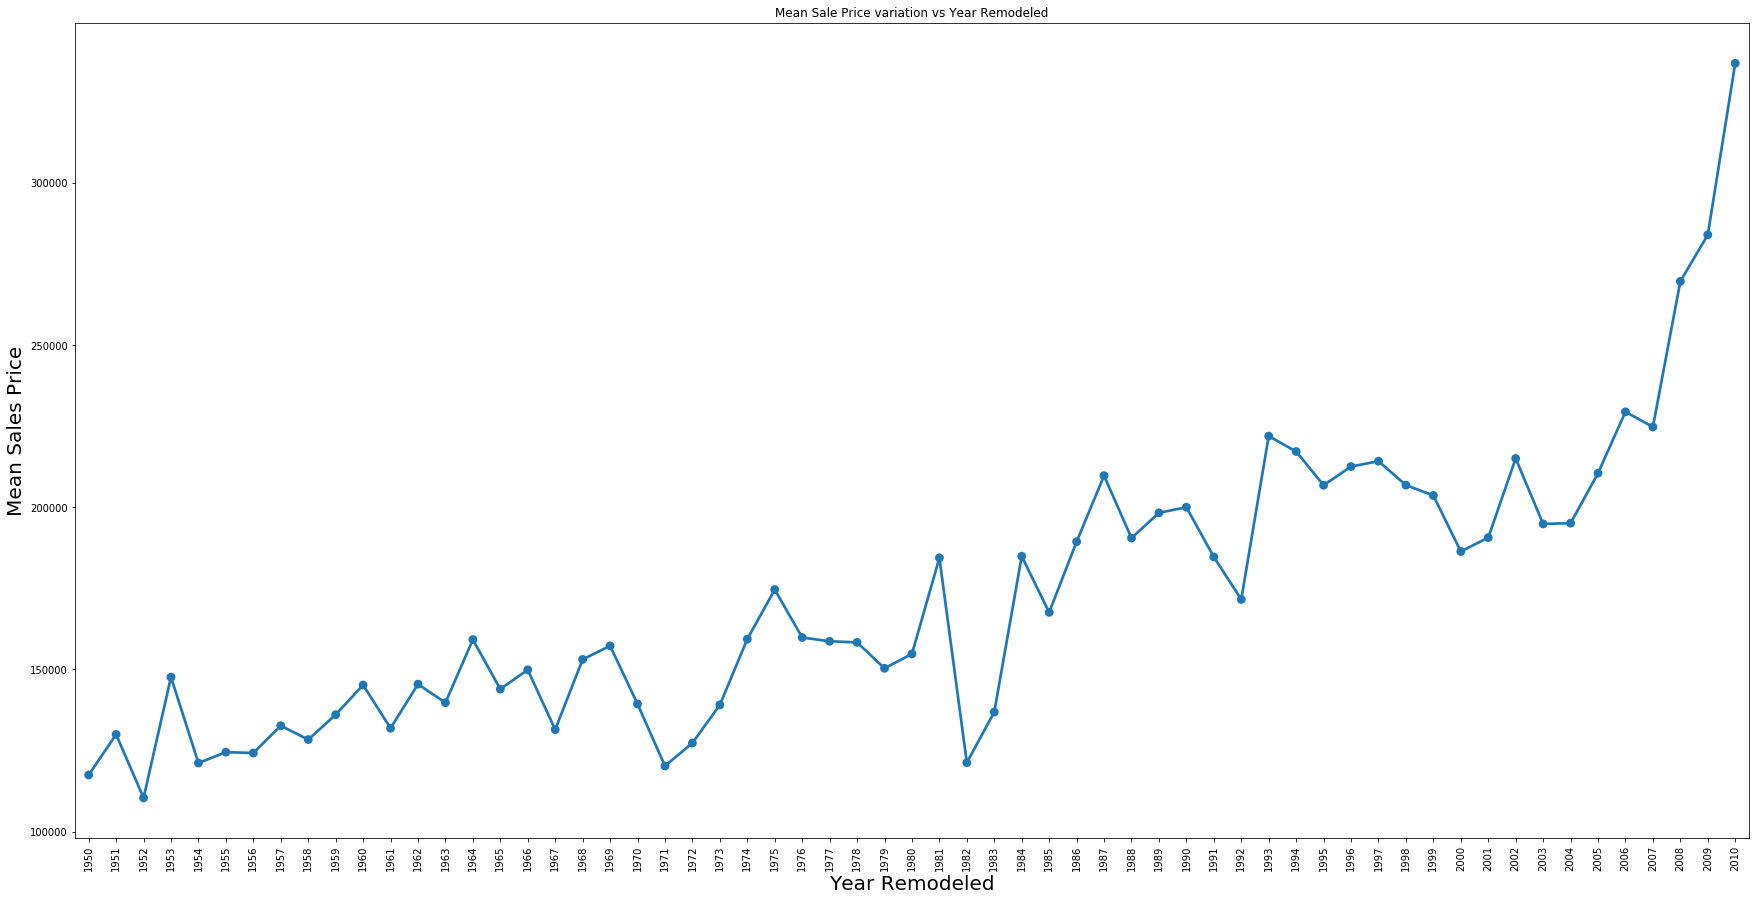

In [18]:
grouped_yrremodel = data_df.groupby(['YearRemodAdd'])['SalePrice'].mean()
grouped_yrremodel = grouped_yrremodel.reset_index()

plt.figure(figsize=(30,15))
sns.pointplot(x='YearRemodAdd',y='SalePrice',data=grouped_yrremodel)
plt.xticks(rotation=90)
plt.xlabel("Year Remodeled",fontsize=20)
plt.ylabel("Mean Sales Price",fontsize=20)
plt.tick_params()
plt.title("Mean Sale Price variation vs Year Remodeled")
plt.show()


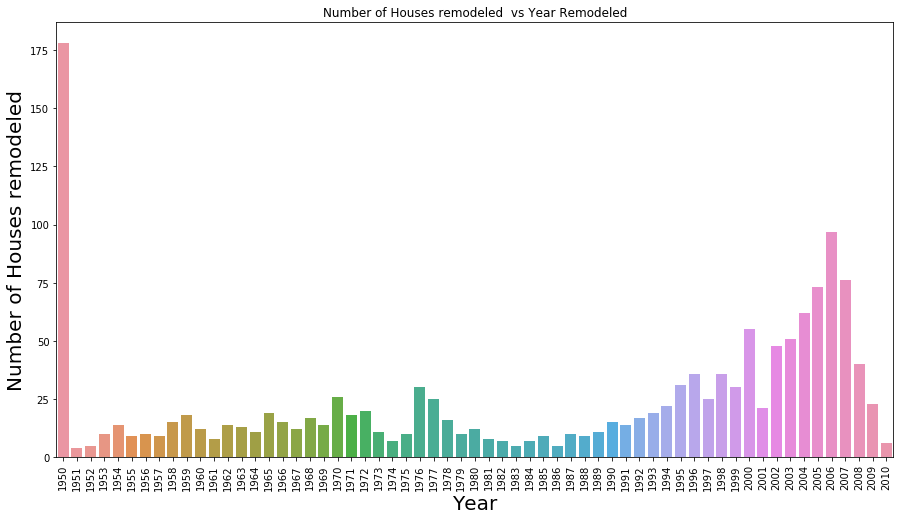

In [19]:
plt.figure(figsize=(15,8))
sns.countplot(x='YearRemodAdd',data=data_df)
plt.xticks(rotation=90)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Number of Houses remodeled",fontsize=20)
plt.tick_params()
plt.title("Number of Houses remodeled  vs Year Remodeled")
plt.show()

From the above figure it looks most of the houses which were built prior to 1950 are remodeled in year 1950

In [20]:
data_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Univariate Analysis

### Lets take a look at distribution of target variable

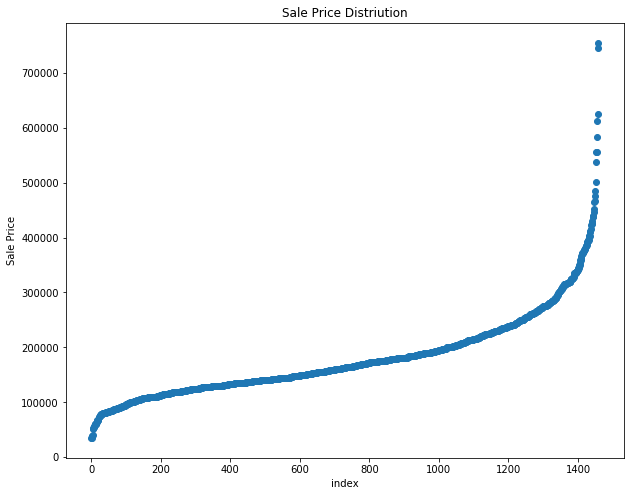

In [21]:
plt.figure(figsize=(10,8))
plt.scatter(range(data_df.shape[0]),np.sort(data_df.SalePrice.values))
plt.xlabel("index")
plt.ylabel("Sale Price")
plt.title("Sale Price Distriution")
plt.show()

From the above figure we can see few outliers
and Now lets try to remove these outliers

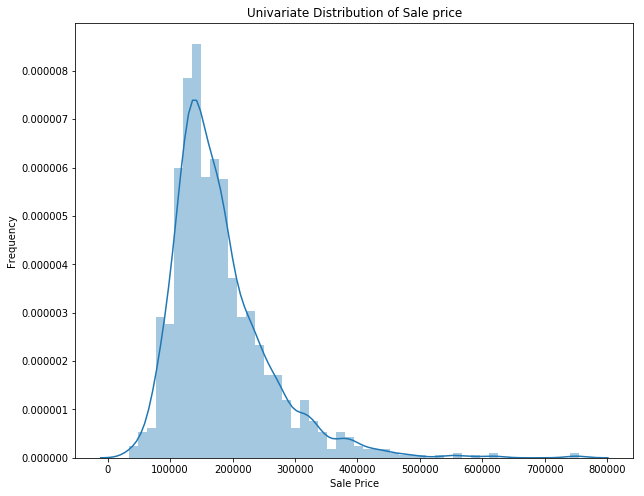

In [22]:
plt.figure(figsize=(10,8))
sns.distplot(data_df.SalePrice.values,bins=50)
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.title("Univariate Distribution of Sale price")
plt.show()

####  peaks, positively skewed,deviates from normal distribution

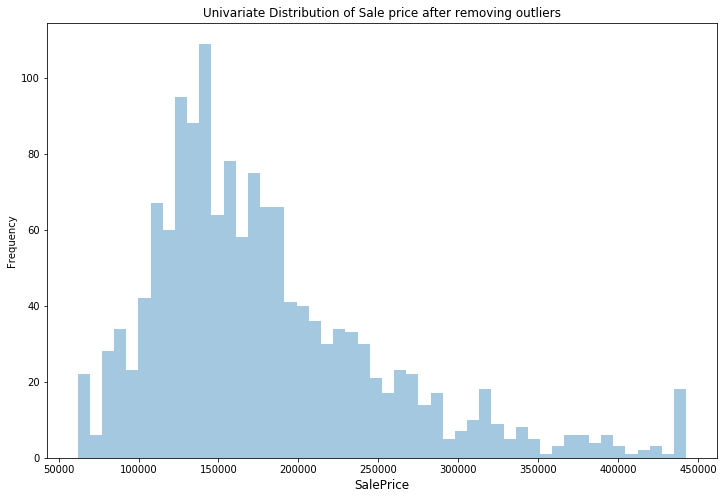

In [23]:
#without outliers

ulimit = np.percentile(data_df.SalePrice.values, 99)
llimit = np.percentile(data_df.SalePrice.values,1)
data_df['SalePrice'].ix[data_df['SalePrice']>ulimit] = ulimit
data_df['SalePrice'].ix[data_df['SalePrice']<llimit] = llimit
plt.figure(figsize=(12,8))
sns.distplot(data_df.SalePrice.values, bins=50, kde=False)
plt.xlabel('SalePrice', fontsize=12)
plt.ylabel("Frequency")
plt.title("Univariate Distribution of Sale price after removing outliers")
plt.show()

In [94]:


ulimit

442567.0100000005

In [24]:
dtype_df = data_df.dtypes.reset_index()
dtype_df.columns = ['Column','Column type']
dtype_df


,Column,Column type
0,Id,int64
1,MSSubClass,int64
2,MSZoning,object
3,LotFrontage,float64
4,LotArea,int64
5,Street,object
6,Alley,object
7,LotShape,object
8,LandContour,object
9,Utilities,object


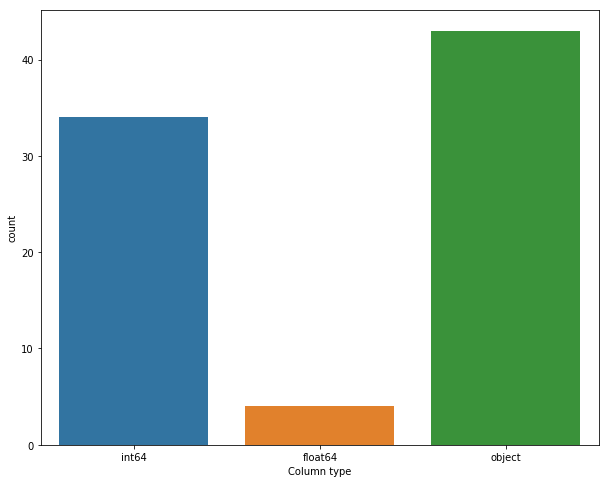

In [25]:
grouped = dtype_df.groupby(['Column type']).agg('count').reset_index()
grouped.columns = ['Column type','count']
plt.figure(figsize=(10,8))
sns.barplot(x=grouped['Column type'],y=grouped['count'])
plt.show()

## Finding Correlations Between features

Since there are 81 features in the dataset and thats a lot, so lets do some univariate analysis.First lets take the float variables alone and let's see how they are correlated with the Saleprice (target variable)

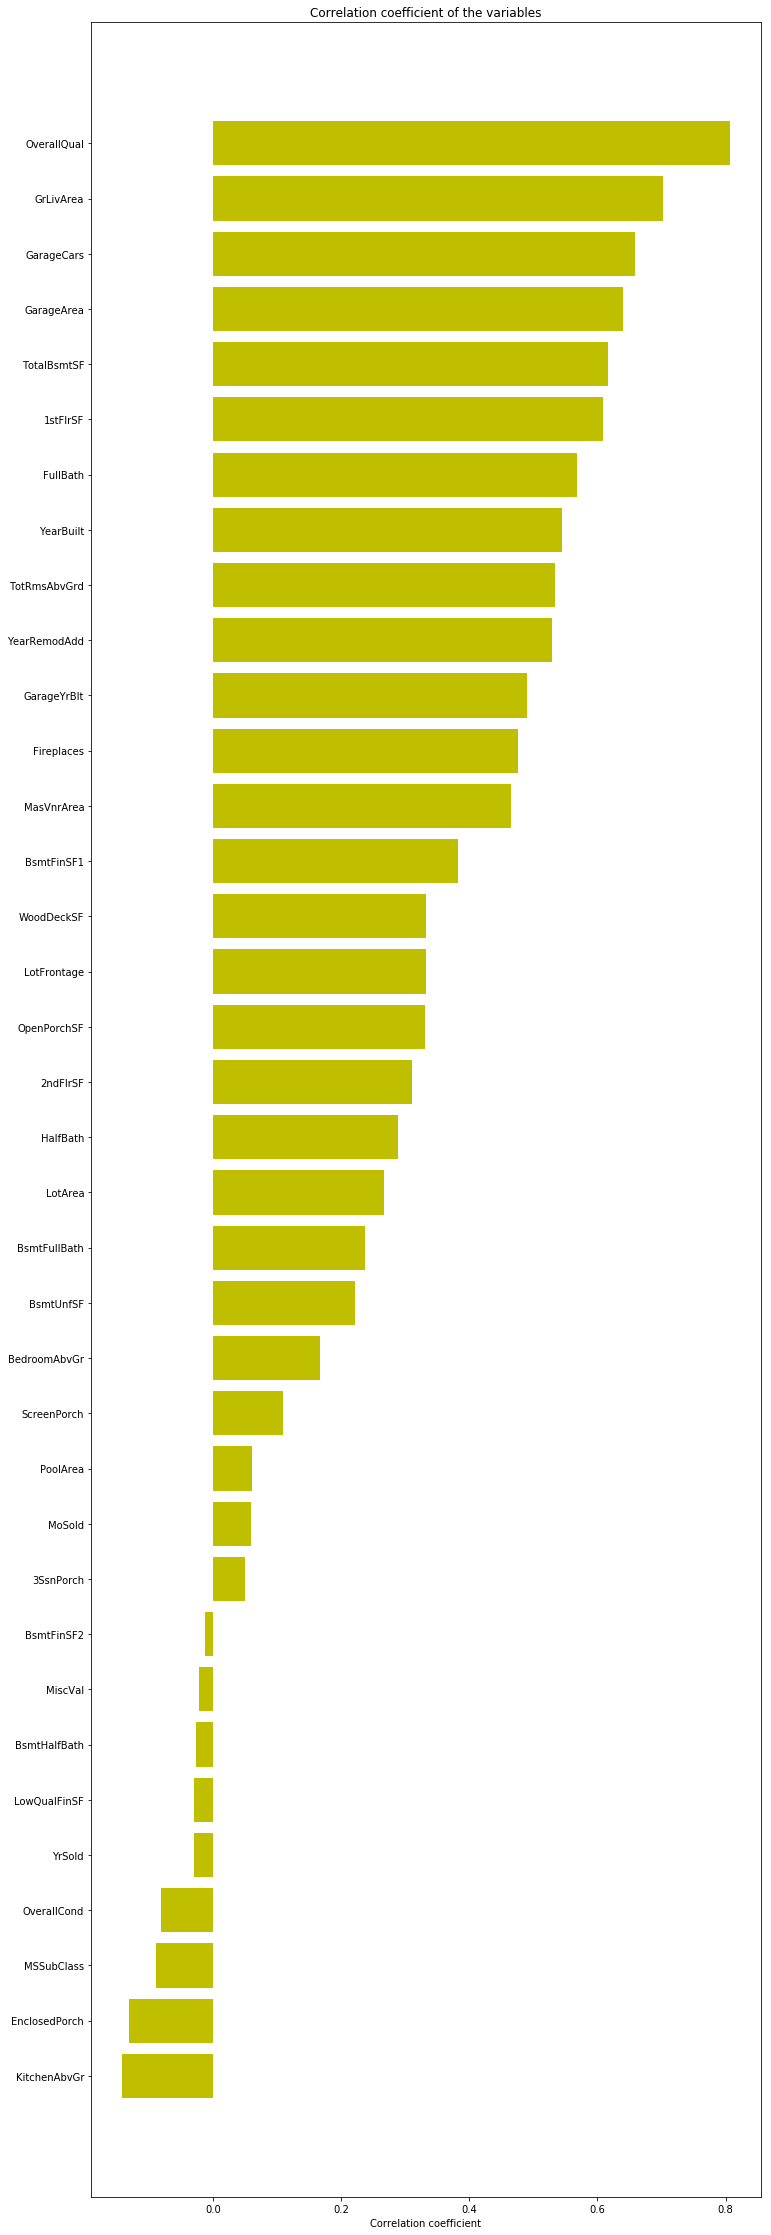

In [26]:
#drop ID
house_df = data_df.copy()
house_df.drop('Id',axis=1,inplace=True)
mean_values = house_df.mean(axis=0)
house_df.fillna(mean_values,inplace=True)

#check
house_df.isnull().sum()
continous_cols = [col  for col in house_df.columns if col not in ['SalePrice']
                  if house_df[col].dtype=='float64' or house_df[col].dtype=='int64']


labels = []
values = []
for col in continous_cols:
    labels.append(col)
    values.append(np.corrcoef(house_df[col].values, house_df.SalePrice.values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
#autolabel(rects)
plt.show()

In [27]:
corr_df.sort_values(by='corr_values',ascending=False)

,col_labels,corr_values
3,OverallQual,0.807566
15,GrLivArea,0.702777
25,GarageCars,0.659362
26,GarageArea,0.640772
11,TotalBsmtSF,0.616690
12,1stFlrSF,0.608477
18,FullBath,0.567676
5,YearBuilt,0.545177
22,TotRmsAbvGrd,0.534526
6,YearRemodAdd,0.529563


From the above we can see that many features have high correlation with the target variable,therefore lets see the correlation map

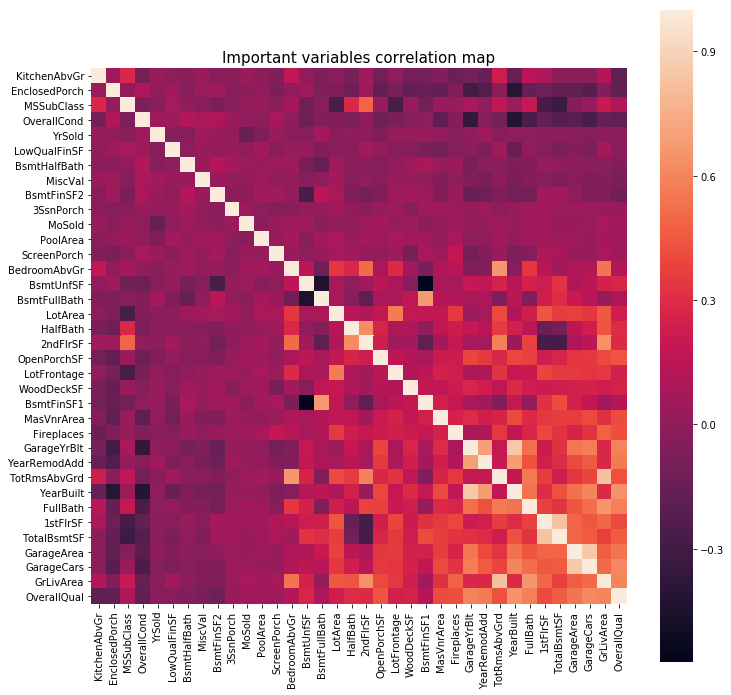

In [28]:
temp_df =house_df[corr_df['col_labels']]
corrmatrix = temp_df.corr(method='spearman')
f,ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmatrix,vmax=1.,square=True)
plt.title("Important variables correlation map", fontsize=15)
plt.show()

#### from the above heatmap we can look for multicollinearity, means we can see if any of the variables are highly correlated to each other( implies they give same information)

#### can you see two squares in the above image? 
#### 1. '1stFlrSF' and 'TotalBsmtSF' variables 
#### 2. 'GarageArea' and 'GarageCars' variables


## Let us Analyse Each important feature

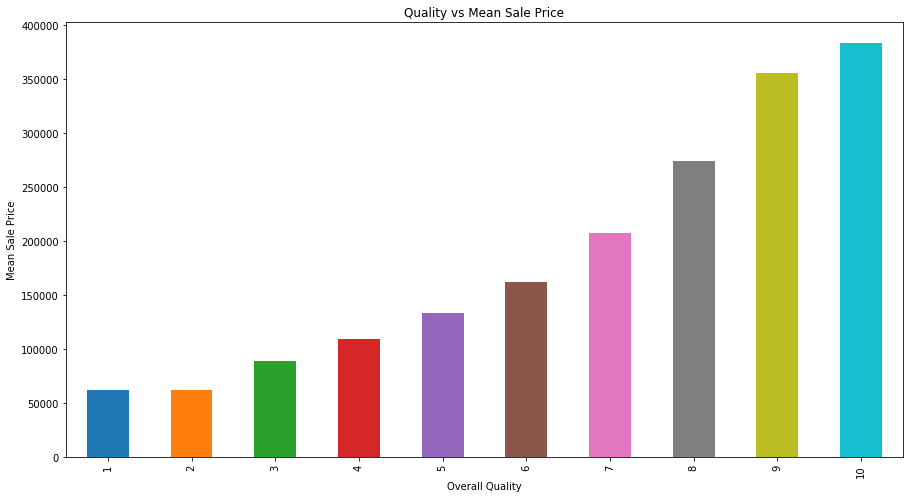

In [30]:
grouped = house_df.groupby(['OverallQual'])['SalePrice'].mean()
plt.figure(figsize=(15,8))
grouped.plot(kind='bar')
plt.xlabel('Overall Quality')
plt.ylabel('Mean Sale Price')
plt.title('Quality vs Mean Sale Price')
plt.show()

#### From the above bar graph we can say that High quality, High Price

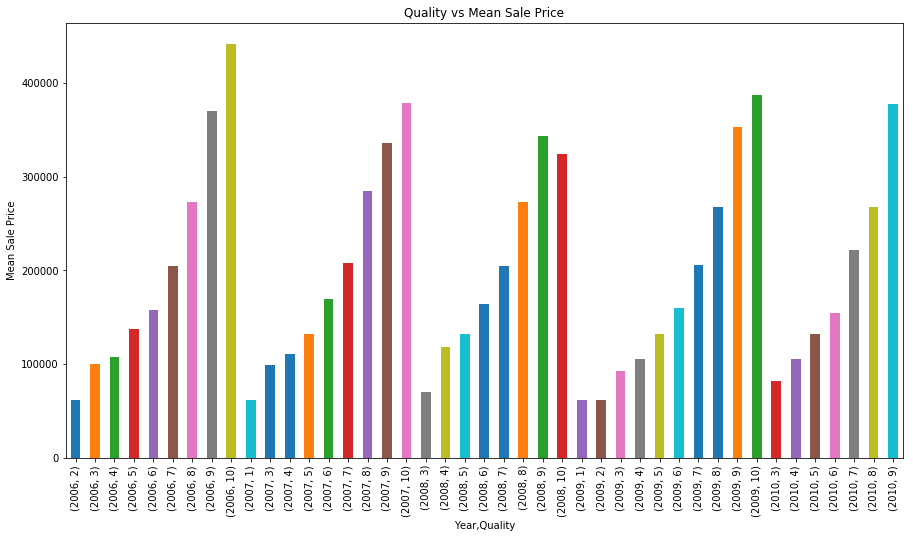

In [31]:
#what was the overallquality when the house was sold
grouped = house_df.groupby(['YrSold','OverallQual'])['SalePrice'].mean()
plt.figure(figsize=(15,8))
grouped.plot(kind='bar')
plt.xlabel('Year,Quality')
plt.ylabel('Mean Sale Price')
plt.title('Quality vs Mean Sale Price')
plt.show()

#### Over the years, we can see the same trend High Quality, High price

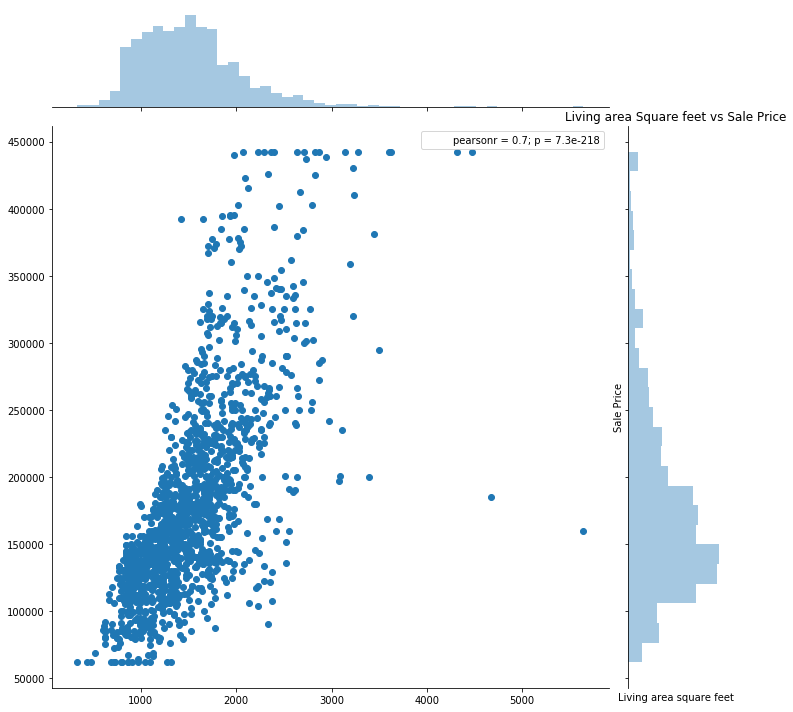

In [32]:
sns.jointplot(house_df['GrLivArea'].values,house_df.SalePrice.values,size=10)
plt.xlabel("Living area square feet")
plt.ylabel("Sale Price")
plt.title("Living area Square feet vs Sale Price")
plt.show()

#### we can see the two outliers from the above scatter plot between living area square feet and Sale Price

In [33]:
data_df = data_df.drop(data_df[(data_df['GrLivArea']>4000) & (data_df['SalePrice']<300000)].index)

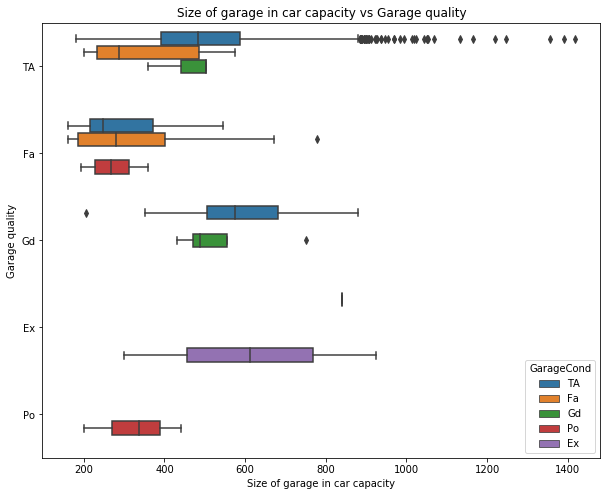

In [34]:

plt.figure(figsize=(10,8))
sns.boxplot(house_df['GarageArea'].values,y=house_df['GarageQual'],hue=house_df['GarageCond'])
plt.xlabel("Size of garage in car capacity")
plt.ylabel("Garage quality")
plt.title("Size of garage in car capacity vs Garage quality")
plt.show()

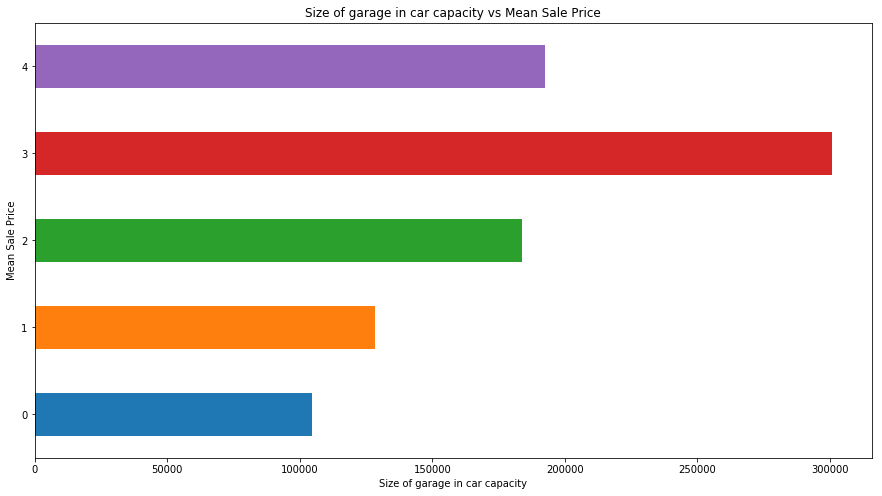

In [35]:
grouped = house_df.groupby(['GarageCars'])['SalePrice'].mean()
plt.figure(figsize=(15,8))
grouped.plot(kind='barh')
plt.xlabel('Size of garage in car capacity')
plt.ylabel('Mean Sale Price')
plt.title('Size of garage in car capacity vs Mean Sale Price')
plt.show()

#### Mean sale price is high for 3 (size of garage in car capacity)

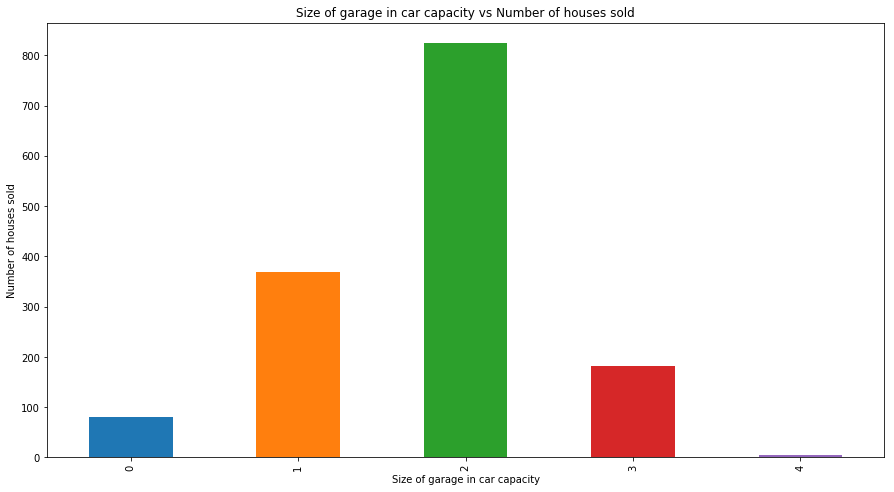

In [36]:
grouped = house_df.groupby(['GarageCars'])['SalePrice'].count()
plt.figure(figsize=(15,8))
grouped.plot(kind='bar')
plt.xlabel('Size of garage in car capacity')
plt.ylabel('Number of houses sold')
plt.title('Size of garage in car capacity vs Number of houses sold')
plt.show()

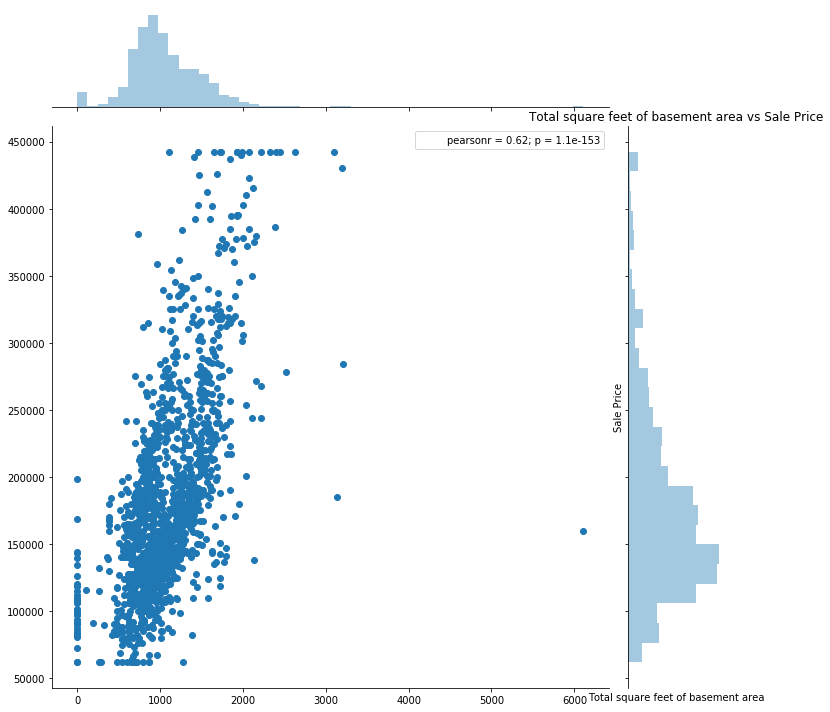

In [37]:

sns.jointplot(house_df['TotalBsmtSF'].values,house_df.SalePrice.values,size=10)
plt.xlabel("Total square feet of basement area")
plt.ylabel("Sale Price")
plt.title("Total square feet of basement area vs Sale Price")
plt.show()

#### one outlier

In [38]:
data_df = data_df.drop(data_df[(data_df['TotalBsmtSF']>6000) & (data_df['SalePrice']<200000)].index)

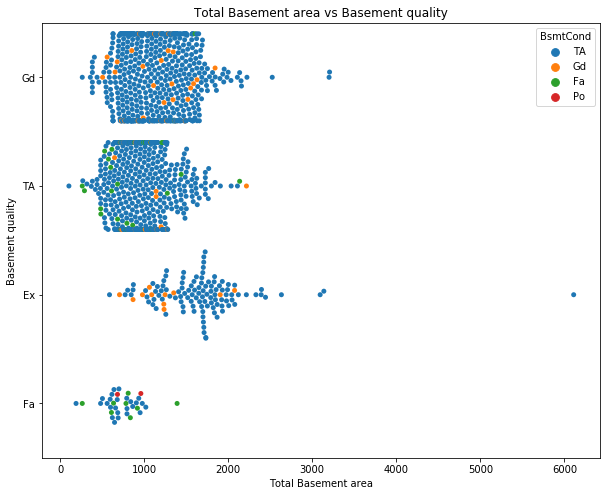

In [39]:
plt.figure(figsize=(10,8))
sns.swarmplot(house_df['TotalBsmtSF'].values,y=house_df['BsmtQual'],hue=house_df['BsmtCond'])
plt.xlabel("Total Basement area")
plt.ylabel("Basement quality")
plt.title("Total Basement area vs Basement quality")
plt.show()

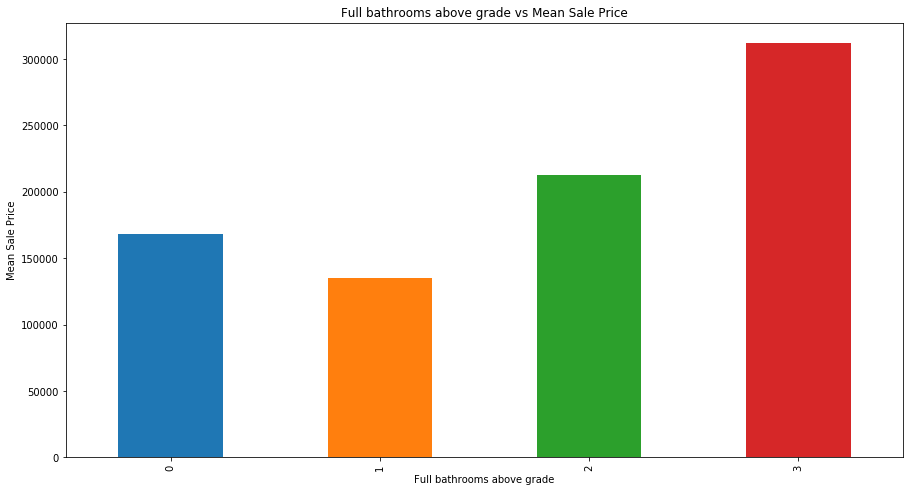

In [40]:
grouped = house_df.groupby(['FullBath'])['SalePrice'].mean()
plt.figure(figsize=(15,8))
grouped.plot(kind='bar')
plt.xlabel('Full bathrooms above grade')
plt.ylabel('Mean Sale Price')
plt.title('Full bathrooms above grade vs Mean Sale Price')
plt.show()

In [41]:
y_train_nn = data_df.SalePrice.copy()
y_train_nn

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
5       143000.0
6       307000.0
7       200000.0
8       129900.0
9       118000.0
10      129500.0
11      345000.0
12      144000.0
13      279500.0
14      157000.0
15      132000.0
16      149000.0
17       90000.0
18      159000.0
19      139000.0
20      325300.0
21      139400.0
22      230000.0
23      129900.0
24      154000.0
25      256300.0
26      134800.0
27      306000.0
28      207500.0
29       68500.0
          ...   
1430    192140.0
1431    143750.0
1432     64500.0
1433    186500.0
1434    160000.0
1435    174000.0
1436    120500.0
1437    394617.0
1438    149700.0
1439    197000.0
1440    191000.0
1441    149300.0
1442    310000.0
1443    121000.0
1444    179600.0
1445    129000.0
1446    157900.0
1447    240000.0
1448    112000.0
1449     92000.0
1450    136000.0
1451    287090.0
1452    145000.0
1453     84500.0
1454    185000.0
1455    175000.0
1456    210000.0
1457    266500

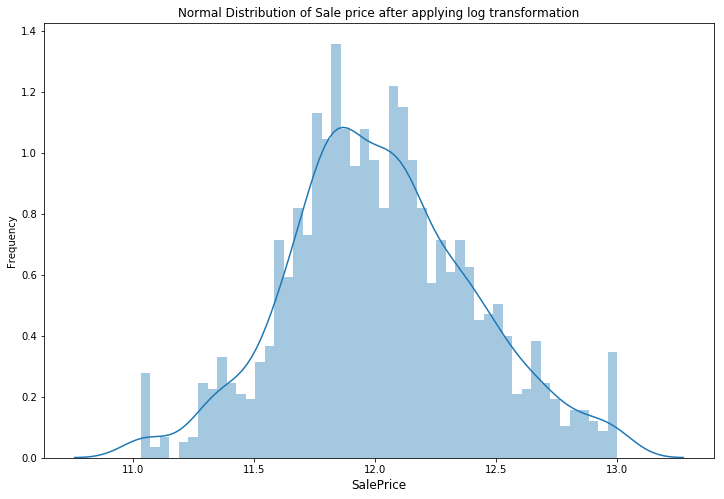

In [42]:
#combine train and test data to remove outliers or apply new transformations
ntrain = data_df.shape[0]
ntest = test_df.shape[0]


# applying log transformation 
data_df["SalePrice"] = np.log1p(data_df["SalePrice"])
plt.figure(figsize=(12,8))
sns.distplot(data_df.SalePrice.values, bins=50)
plt.xlabel('SalePrice', fontsize=12)
plt.ylabel("Frequency")
plt.title("Normal Distribution of Sale price after applying log transformation")
plt.show()
y_train = data_df.SalePrice.values
combined_data = pd.concat((data_df, test_df)).reset_index(drop=True)
combined_data.drop(['SalePrice'], axis=1, inplace=True)

## Handling missing values

In [43]:
#Pool quality
combined_data["PoolQC"] = combined_data["PoolQC"].fillna("None")


In [44]:
y_train_nn

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
5       143000.0
6       307000.0
7       200000.0
8       129900.0
9       118000.0
10      129500.0
11      345000.0
12      144000.0
13      279500.0
14      157000.0
15      132000.0
16      149000.0
17       90000.0
18      159000.0
19      139000.0
20      325300.0
21      139400.0
22      230000.0
23      129900.0
24      154000.0
25      256300.0
26      134800.0
27      306000.0
28      207500.0
29       68500.0
          ...   
1430    192140.0
1431    143750.0
1432     64500.0
1433    186500.0
1434    160000.0
1435    174000.0
1436    120500.0
1437    394617.0
1438    149700.0
1439    197000.0
1440    191000.0
1441    149300.0
1442    310000.0
1443    121000.0
1444    179600.0
1445    129000.0
1446    157900.0
1447    240000.0
1448    112000.0
1449     92000.0
1450    136000.0
1451    287090.0
1452    145000.0
1453     84500.0
1454    185000.0
1455    175000.0
1456    210000.0
1457    266500

In [45]:
# MiscFeature
combined_data["MiscFeature"] = combined_data["MiscFeature"].fillna("None")

#Alley
combined_data["Alley"] = combined_data["Alley"].fillna("None")

#Fence
combined_data["Fence"] = combined_data["Fence"].fillna("None")

#LotFrontage
combined_data["LotFrontage"] = combined_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))


In [46]:
#Garage and basement variables
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    combined_data[col] = combined_data[col].fillna('None')

In [47]:
#Masonry veneer type
combined_data["MasVnrType"] = combined_data["MasVnrType"].fillna("None")
combined_data["MasVnrArea"] = combined_data["MasVnrArea"].fillna(0)
combined_data['MSZoning'] = combined_data['MSZoning'].fillna(combined_data['MSZoning'].mode()[0])

In [48]:
#GarageYrBlt, GarageArea and GarageCars
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    combined_data[col] = combined_data[col].fillna(0)

In [49]:
#BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    combined_data[col] = combined_data[col].fillna(0)

In [50]:
#drop utilities
combined_data = combined_data.drop(['Utilities'], axis=1)


combined_data["Functional"] = combined_data["Functional"].fillna("Typ")

combined_data['Electrical'] = combined_data['Electrical'].fillna(combined_data['Electrical'].mode()[0])


combined_data['KitchenQual'] = combined_data['KitchenQual'].fillna(combined_data['KitchenQual'].mode()[0])

combined_data['Exterior1st'] = combined_data['Exterior1st'].fillna(combined_data['Exterior1st'].mode()[0])
combined_data['Exterior2nd'] = combined_data['Exterior2nd'].fillna(combined_data['Exterior2nd'].mode()[0])


combined_data['SaleType'] = combined_data['SaleType'].fillna(combined_data['SaleType'].mode()[0])

combined_data['MSSubClass'] = combined_data['MSSubClass'].fillna("None")

In [51]:
#check for null values
#NA implies no fire place, hence replace with None

combined_data['FireplaceQu'] = combined_data['FireplaceQu'].fillna('None')
combined_data['FireplaceQu'].value_counts(dropna=False)

None    1420
Gd       742
TA       592
Fa        74
Po        46
Ex        43
Name: FireplaceQu, dtype: int64

In [52]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
for col in cols:
    encoder = LabelEncoder()
    encoder.fit(list(combined_data[col].values))
    combined_data[col] = encoder.transform(list(combined_data[col]))
    

In [53]:
combined_data = pd.get_dummies(combined_data)

In [54]:
combined_data.shape
combined_data.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       ...
       'SaleCondition_Partial', 'SaleType_COD', 'SaleType_CWD', 'SaleType_Con',
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleType_WD'],
      dtype='object', length=220)

In [55]:
train_data_df = combined_data[:ntrain]
test_data_df = combined_data[ntrain:]

# Models

In [56]:
#apply log transformation
train_data_df = np.log1p(train_data_df)
test_data_df = np.log1p(test_data_df)

## Linear Regression

In [57]:
#Linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_data_df,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
#Validation function

from sklearn.model_selection import cross_val_score,KFold

n_folds = 5

def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_data_df)
    rmse= np.sqrt(-cross_val_score(model, train_data_df, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [59]:
score_lr = rmse_cv(lr)

In [60]:
def displayScore(score):
    print(" mean is {} ".format(score.mean()))
    print(" Standard Deviation is {} ".format(score.std()))
    print(" scores are {} ".format(score))
    

In [61]:
displayScore(score_lr)

 mean is 0.12069456271006321 
 Standard Deviation is 0.011203225451654732 
 scores are [0.10717888 0.13342521 0.13412571 0.11102034 0.11772268] 


## Ridge Regression

In [62]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)
ridge.fit(train_data_df,y_train)


Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [63]:
score_ridge = rmse_cv(ridge)
displayScore(score_ridge)

 mean is 0.11531812865369154 
 Standard Deviation is 0.010614275340788541 
 scores are [0.10043452 0.12369104 0.13034329 0.10886052 0.11326127] 


In [64]:
from sklearn.kernel_ridge import KernelRidge 
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
KRR.fit(train_data_df,y_train)

KernelRidge(alpha=0.6, coef0=2.5, degree=2, gamma=None, kernel='polynomial',
      kernel_params=None)

In [65]:
score_KRR = rmse_cv(KRR)
displayScore(score_KRR)

 mean is 0.11253472651724787 
 Standard Deviation is 0.009048773627328073 
 scores are [0.10320149 0.1200002  0.12571249 0.1030753  0.11068415] 


## Lasso Regression

In [66]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Lasso
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=42))
lasso.fit(train_data_df,y_train)

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('lasso', Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [67]:
score_lasso = rmse_cv(lasso)

In [68]:
displayScore(score_lasso)

 mean is 0.11067458949889035 
 Standard Deviation is 0.010444027706401234 
 scores are [0.09908211 0.11878431 0.12576623 0.09986541 0.10987489] 


## Elastic Net

In [83]:
from sklearn.linear_model import ElasticNet
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=42))
ENet.fit(train_data_df,y_train)

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('elasticnet', ElasticNet(alpha=0.0005, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=42, selection='cyclic', tol=0.0001, warm_start=False))])

In [84]:
score_ENet = rmse_cv(ENet)
displayScore(score_ENet)

 mean is 0.11049164225051296 
 Standard Deviation is 0.010396975736708784 
 scores are [0.09862307 0.11856283 0.12543536 0.09996653 0.10987042] 


In [70]:
# inverse funciton of log(1+x)
np.expm1(lasso.predict(test_data_df))

array([119156.71071675, 148371.76362851, 184410.50055583, ...,
       169160.58131833, 121322.04446748, 226610.0806234 ])

## SVM Regression

In [71]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(train_data_df,y_train)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

In [72]:
score_svm = rmse_cv(svm_reg)
displayScore(score_svm)

 mean is 0.7474178997943032 
 Standard Deviation is 0.19620372859318289 
 scores are [1.09998146 0.81407611 0.66330845 0.59583997 0.56388352] 


## Decision Tree Regressor

In [73]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=5)
tree_reg.fit(train_data_df,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [74]:
score_DT  = rmse_cv(tree_reg)
displayScore(score_DT)

 mean is 0.18591112830965484 
 Standard Deviation is 0.008388818599191319 
 scores are [0.17410026 0.2000904  0.18725189 0.18290841 0.18520468] 


## Gradient Boosting Regressor

In [75]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=4, n_estimators=3000, learning_rate=0.05,max_features='sqrt',min_samples_leaf=15,
                                 min_samples_split=10,loss='huber', random_state =42)
gbrt.fit(train_data_df,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=4,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=3000,
             presort='auto', random_state=42, subsample=1.0, verbose=0,
             warm_start=False)

In [76]:
score_gb = rmse_cv(gbrt)
displayScore(score_gb)

 mean is 0.10904263533179477 
 Standard Deviation is 0.009121769109251035 
 scores are [0.10356271 0.11669757 0.11866886 0.09405612 0.11222792] 


## Random Forest Regressor

In [90]:
from sklearn.ensemble import RandomForestRegressor
Random_tree_reg = RandomForestRegressor(n_estimators=3000)
Random_tree_reg.fit(train_data_df,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=3000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [91]:
score_RT = rmse_cv(Random_tree_reg)
displayScore(score_RT)

 mean is 0.13062172865626345 
 Standard Deviation is 0.007759024013446161 
 scores are [0.13120748 0.13068092 0.13896857 0.11636444 0.13588724] 


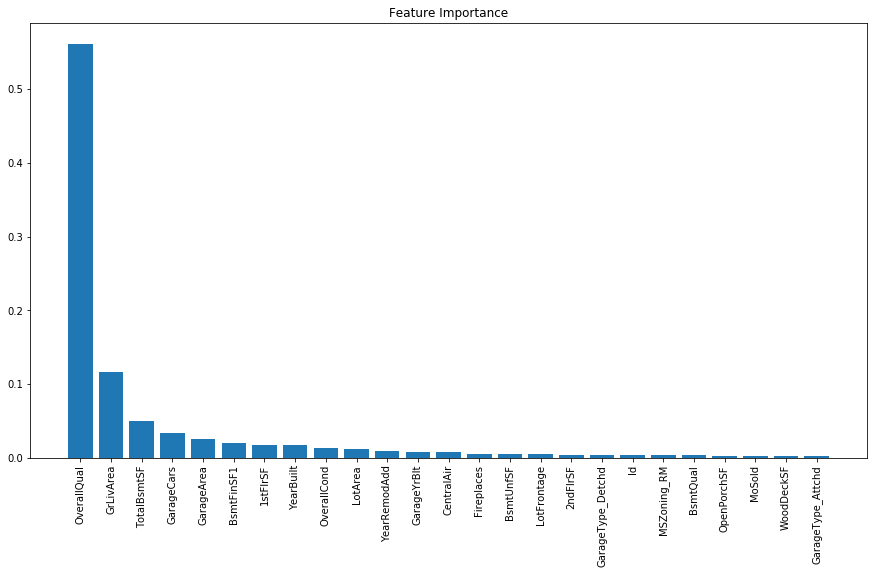

In [92]:
# Calculate feature importances
importances = Random_tree_reg.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1][:25]

# Rearrange feature names so they match the sorted feature importances
names = [train_data_df.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(15,8))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(len(indices)), importances[indices])

# Add feature names as x-axis labels
plt.xticks((range(len(indices))), names, rotation=90)

# Show plot
plt.show()

### seems like Overall Quality variable is the most important feature followed by garage living area

## Hyperparamter tuning using GridSearchCV

In [80]:
#from sklearn.grid_search import GridSearchCV
#gbrt1 = GradientBoostingRegressor()
#param_grid = {'max_depth':[2,4],
#             'n_estimators':[3000,4000],
#             'learning_rate':[0.05,0.1],
#             'min_samples_leaf':[10,15],
#            'min_samples_split':[5,10]}

#gridSearch = GridSearchCV(estimator=gbrt1,param_grid=param_grid,cv=5,n_jobs=-1)
#gridSearch.fit(train_data_df,y_train)

## Feature importance using XGBoost

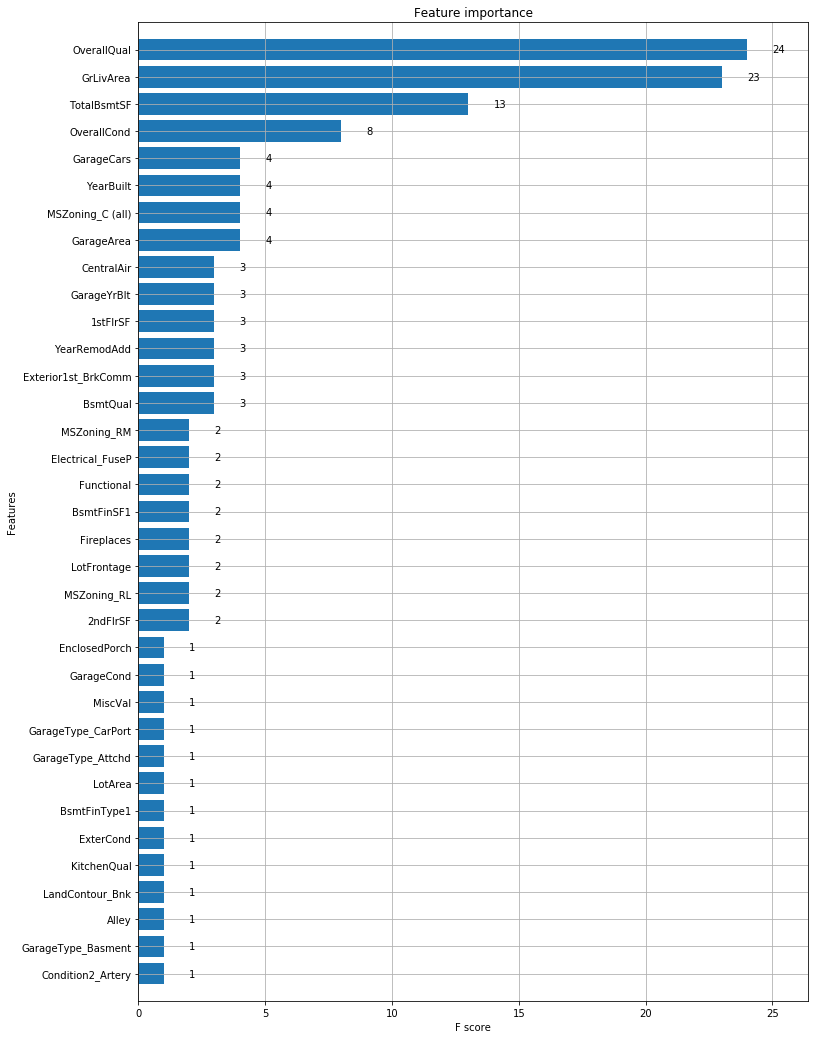

In [82]:
import xgboost as xgb
xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1,
    'seed' : 0
}
dtrain = xgb.DMatrix(train_data_df, y_train, feature_names=train_data_df.columns.values)
model_xgb = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=50)

# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model_xgb, height=0.8, ax=ax)
plt.show()

## Bagging

In [85]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
bag_reg = BaggingRegressor(
DecisionTreeRegressor(), n_estimators=500,
max_samples=100, bootstrap=True, n_jobs=-1
)
bag_reg.fit(train_data_df, y_train)

score_bag_reg  = rmse_cv(bag_reg)

displayScore(score_bag_reg)

 mean is 0.14693960268195932 
 Standard Deviation is 0.0073525509924117485 
 scores are [0.14116621 0.15048422 0.15515063 0.13560914 0.15228781] 


## Extra Tree Regressor

In [93]:
from sklearn.ensemble import ExtraTreesRegressor
Extra_tree_reg = ExtraTreesRegressor(n_estimators=3000)
Extra_tree_reg.fit(train_data_df,y_train)


score_Extra_reg  = rmse_cv(Extra_tree_reg)

displayScore(score_Extra_reg)

 mean is 0.12522934327704408 
 Standard Deviation is 0.011702081136882665 
 scores are [0.11581988 0.1326484  0.14184099 0.10902276 0.12681469] 


In [ ]:
#example

#from sklearn.tree import DecisionTreeRegressor
#tree_reg1 = DecisionTreeRegressor(max_depth=2)
#tree_reg1.fit(X, y)


#y2 = y - tree_reg1.predict(X)
#tree_reg2 = DecisionTreeRegressor(max_depth=2)
#tree_reg2.fit(X, y2)

#y3 = y2 - tree_reg2.predict(X)
#tree_reg3 = DecisionTreeRegressor(max_depth=2)
#tree_reg3.fit(X, y3)

#y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))